# Temperature Prediction Using RNN

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [0]:
path = "./jena_climate_2009_2016.csv"
f = open(path)
data = f.read()
f.close()

In [3]:
split = data.split("\n")
# print(len(split[1]))
print(split[2])
print(split[2].split(","))

01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10
['01.01.2009 00:20:00', '996.57', '-8.41', '265.01', '-9.28', '93.40', '3.23', '3.02', '0.21', '1.89', '3.03', '1309.80', '0.72', '1.50', '136.10']


In [4]:
dataset1 = pd.read_csv("./jena_climate_2009_2016.csv")
print(dataset1.columns)
dataset1.head(5)

Index(['Date Time', 'p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)',
       'rh (%)', 'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [5]:
# data[400:800]
dataset1=dataset1.drop(axis = 0 , columns = "Date Time")
dataset1.head(2)

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1


In [6]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 14 columns):
p (mbar)           420551 non-null float64
T (degC)           420551 non-null float64
Tpot (K)           420551 non-null float64
Tdew (degC)        420551 non-null float64
rh (%)             420551 non-null float64
VPmax (mbar)       420551 non-null float64
VPact (mbar)       420551 non-null float64
VPdef (mbar)       420551 non-null float64
sh (g/kg)          420551 non-null float64
H2OC (mmol/mol)    420551 non-null float64
rho (g/m**3)       420551 non-null float64
wv (m/s)           420551 non-null float64
max. wv (m/s)      420551 non-null float64
wd (deg)           420551 non-null float64
dtypes: float64(14)
memory usage: 44.9 MB


<Figure size 432x288 with 0 Axes>

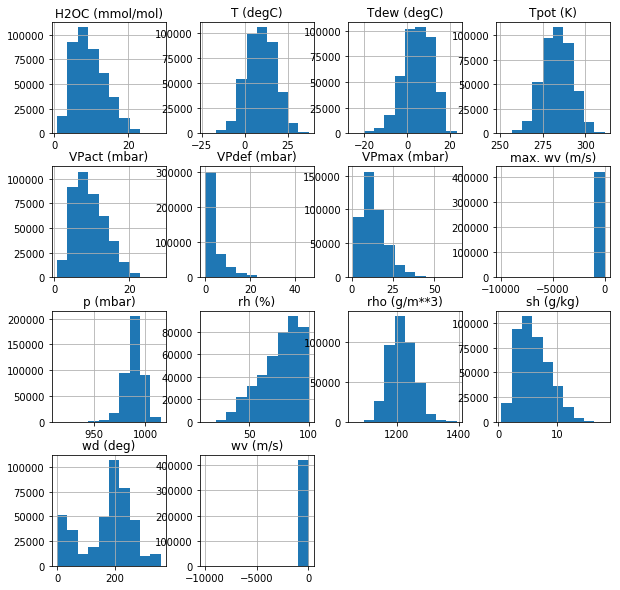

In [7]:
plt.figure()
dataset1.hist(figsize = (10,10))
plt.show()

In [8]:
import numpy as np
# print(dataset1.columns)
dataset = dataset1.values
dataset.shape

(420551, 14)

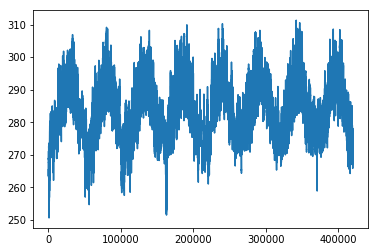

In [9]:
plt.figure()
plt.plot(range(len(dataset[:,2])) , dataset[:,2])
plt.show()

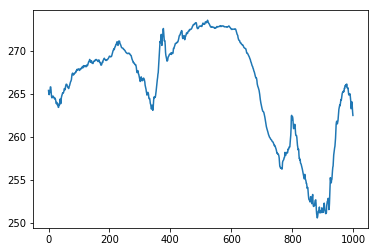

In [10]:
plt.figure()
plt.plot(range(len(dataset[:1000,2])) , dataset[:1000,2])
plt.show()

### Preparing the data or Normalising

In [11]:
for i in range(1,dataset.shape[1]):
    mean = dataset[:100000,i].mean(axis=0)
    std = dataset[:100000,i].std(axis=0)
    dataset[:100000,i]=dataset[:100000,i]-mean
    dataset[:100000,i]=dataset[:100000,i]/std
dataset[0,0]

996.52

In [0]:
# dataset[:,0]=[float(i) for i in dataset[:,0]]
# print(type(dataset[0,0]))

In [0]:
dataset1 = pd.DataFrame(data=dataset[0:,0:],    # values
index=range(0,len(dataset)),    # 1st column as index
columns=dataset1.columns) 

In [14]:
print(len(dataset1.columns))
dataset1.head(5)

14


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.52,-1.946340,-2.032254,-1.910941,1.030216,-1.298112,-1.503142,-0.764211,-1.510099,-1.512007,2.268119,-0.724015,-0.776594,-0.240716
1,996.57,-1.991296,-2.077190,-1.965162,1.036347,-1.311340,-1.525043,-0.766313,-1.529296,-1.533667,2.319188,-0.925102,-0.885178,-0.423916
2,996.53,-2.002823,-2.088712,-1.969443,1.067000,-1.313986,-1.527477,-0.768415,-1.533135,-1.536074,2.330149,-1.268896,-1.263050,-0.022460
3,996.51,-1.979769,-2.064516,-1.935198,1.085392,-1.307371,-1.512876,-0.770517,-1.517778,-1.521634,2.303992,-1.171596,-1.319514,0.276089
4,996.51,-1.975158,-2.061059,-1.930917,1.079261,-1.306049,-1.510442,-0.770517,-1.517778,-1.519227,2.299259,-1.184569,-1.263050,0.460420


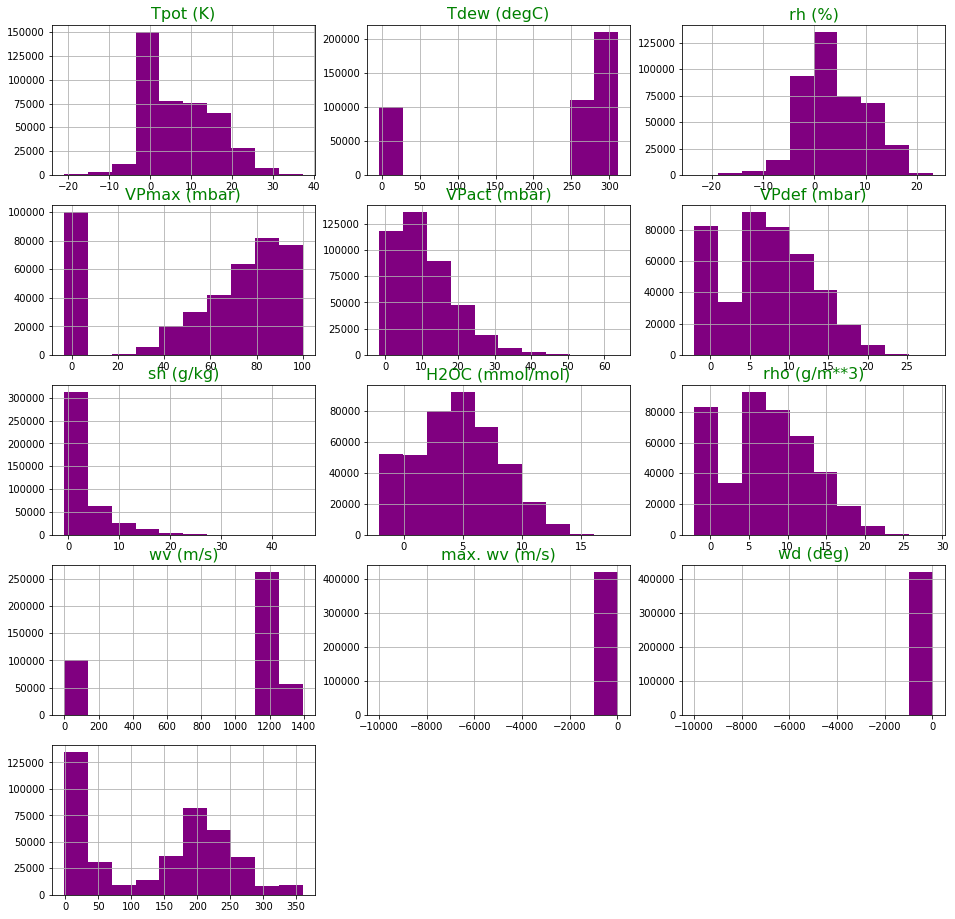

In [15]:
plt.figure(figsize=(16,16))
for i , p in enumerate(dataset1.columns):
    if i==0: 
        continue
    plt.title(p,fontsize=16,color="green")
    plt.subplot(5,3,i)
    dataset1[p].hist(color="purple")
plt.show()


In [0]:
# dataset2 = dataset1.drop(axis=0,columns=dataset2.head(4)dataset1.columns[0])
# dataset2.head(4)
# plt.figure()
# dataset2.hist()
# plt.show()

In [17]:
np.random.randint(3,8,2)

array([4, 4])

### Generator (sample and target)

In [0]:
def generator(data,past,future,min_idx,max_idx,step=6,batch_size=128,shuffle=True):
    
    if max_idx == None:
        max_idx = len(data)-future-1
    curr_row = min_idx + past
    
    while True:
        if shuffle == True:
            rows = np.random.randint(low=min_idx+past ,high=max_idx ,size=batch_size)
            
        else:
            if curr_row+batch_size >= max_idx:
                min_idx = min_idx + past
                
            rows = np.arange(curr_row , min(curr_row+batch_size,max_idx))
            curr_row += len(rows)
            
        sample = np.zeros((len(rows),past//step,data.shape[-1]))
        target = np.zeros((len(rows),))
        
        for j , r in enumerate(rows):
            indices = range(rows[j]-past,rows[j],step)
            sample[j] = data[indices]
            target[j] = data[rows[j]+future][1]
            
        yield(sample,target)

In [19]:
for s,t in generator(dataset,past=1440,future=144,min_idx=0,max_idx=None,shuffle=False):
    print(s.shape)
    print(t.shape)
    print(s[1,1:5,1])
    print(t[[1]])
    break

(128, 240, 14)
(128,)
[-1.9002305  -2.03971085 -2.05239089 -2.11579105]
[-2.05354362]


### Generators

In [0]:
lookup = 1440
delay = 144 #how much look in future
steps = 6 # 1hour
shuffle = True
batch_size1 = 128

train_gen = generator(dataset,
                      past=lookup,future=delay
                      ,min_idx=0
                      ,max_idx=200000
                      ,step=steps
                      ,batch_size=batch_size1
                      ,shuffle=shuffle)
val_gen = generator(dataset,
                      past=lookup,future=delay
                      ,min_idx=200001
                      ,max_idx=300000
                      ,step=steps
                      ,batch_size=batch_size1
                      ,shuffle=shuffle)
test_gen = generator(dataset,
                      past=lookup,future=delay
                      ,min_idx=300001
                      ,max_idx=None
                      ,step=steps
                      ,batch_size=batch_size1
                      ,shuffle=shuffle)

In [21]:
for s,t in train_gen:
    print("Training Generator :: ")
    print(s.shape)
    print(t.shape)
    print(s[1,1:5,1])
    print(t[[1]])
    print("*"*60)
    break
for s,t in val_gen:
    print("validation Generator :: ")
    print(s.shape)
    print(t.shape)
    print(s[1,1:5,1])
    print(t[[1]])
    print("*"*60)
    break
for s,t in test_gen:
    print("Testing Generator :: ")
    print(s.shape)
    print(t.shape)
    print(s[1,1:5,1])
    print(t[[1]])
    print("*"*60)
    break

Training Generator :: 
(128, 240, 14)
(128,)
[-0.38323752 -0.37632114 -0.3521138  -0.40283393]
[-0.49851054]
************************************************************
validation Generator :: 
(128, 240, 14)
(128,)
[3.03 3.52 3.97 4.28]
[6.16]
************************************************************
Testing Generator :: 
(128, 240, 14)
(128,)
[3.32 2.82 2.89 2.83]
[-1.82]
************************************************************


In [22]:
val_steps = (30000-20001-lookup)//steps
test_steps = (len(dataset)-30001-lookup)//steps
print(val_steps,test_steps)

1426 64851


### Naive Method(Today Temp is one day before temp)

In [0]:
def NaivePrediction(valgenerator):
    mae = list() #list of mean absoute error
    for _ in range(val_steps):
        sample,target = next(valgenerator)
        pred = sample[:,-1,1]
        abserr = np.mean(np.abs(pred-target))
        mae.append(abserr)
        
    return np.mean(np.array(mae))

In [24]:
NaivePrediction(val_gen)

2.5655961825035063

In [25]:
print("Temperature error")
temperature_std=2.57
print(2.56*temperature_std)

Temperature error
6.5792


### Model Architecture (simple FCC)

In [26]:
from keras.models import Sequential
from keras.layers import Flatten,Dense
model = Sequential()
model.add(Flatten(input_shape=(lookup//steps,dataset.shape[-1])))
model.add(Dense(32,activation="relu"))
model.add(Dense(1))
model.summary()

Using TensorFlow backend.
W0814 15:57:24.375855 139672669734784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0814 15:57:24.390433 139672669734784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0814 15:57:24.400481 139672669734784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3360)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                107552    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 107,585
Trainable params: 107,585
Non-trainable params: 0
_________________________________________________________________


In [27]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(),loss="mae",metrics=["acc"])

W0814 15:57:24.449015 139672669734784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



### Training our model

In [28]:
history = model.fit_generator(train_gen,
                   steps_per_epoch=500,
                   epochs=10,
                   validation_data=val_gen,
                   validation_steps=val_steps)

W0814 15:57:24.656790 139672669734784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0814 15:57:24.663424 139672669734784 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/10
500/500 [==============================] - 17s 35ms/step - loss: 18.8324 - acc: 1.5625e-04 - val_loss: 10.0755 - val_acc: 3.4515e-04
Epoch 2/10
500/500 [==============================] - 16s 33ms/step - loss: 5.7204 - acc: 6.2500e-05 - val_loss: 9.8658 - val_acc: 6.1360e-04
Epoch 3/10
500/500 [==============================] - 16s 32ms/step - loss: 5.7416 - acc: 7.8125e-05 - val_loss: 9.7793 - val_acc: 5.8621e-04
Epoch 4/10
500/500 [==============================] - 16s 32ms/step - loss: 5.7122 - acc: 6.2500e-05 - val_loss: 9.7471 - val_acc: 5.6430e-04
Epoch 5/10
500/500 [==============================] - 16s 32ms/step - loss: 5.7371 - acc: 1.7188e-04 - val_loss: 9.7449 - val_acc: 6.4100e-04
Epoch 6/10
500/500 [==============================] - 16s 32ms/step - loss: 5.7191 - acc: 7.8125e-05 - val_loss: 9.7706 - val_acc: 6.2456e-04
Epoch 7/10
500/500 [==============================] - 16s 32ms/step - loss: 5.6968 - acc: 6.2500e-05 - val_loss: 9.7475 - val_acc: 6.4100e-04
Epoc

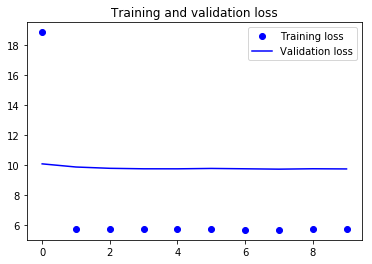

In [30]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [32]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32, input_shape=(None, dataset.shape[-1])))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(), loss='mae')
history = model.fit_generator(train_gen,
                              steps_per_epoch=500,
                              epochs=20,
                              validation_data=val_gen,
                              validation_steps=val_steps)

W0814 16:01:23.299341 139672669734784 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
500/500 [==============================] - 187s 373ms/step - loss: 4.5266 - val_loss: 6.3395
Epoch 2/20
500/500 [==============================] - 185s 370ms/step - loss: 3.7154 - val_loss: 5.8155
Epoch 3/20
500/500 [==============================] - 185s 369ms/step - loss: 3.5156 - val_loss: 5.5622
Epoch 4/20
500/500 [==============================] - 192s 384ms/step - loss: 3.3472 - val_loss: 5.2297
Epoch 5/20
500/500 [==============================] - 194s 388ms/step - loss: 3.2142 - val_loss: 4.9748
Epoch 6/20
500/500 [==============================] - 187s 374ms/step - loss: 3.0800 - val_loss: 4.7647
Epoch 7/20
500/500 [==============================] - 186s 372ms/step - loss: 2.9912 - val_loss: 4.5442
Epoch 8/20
500/500 [==============================] - 186s 371ms/step - loss: 2.8848 - val_loss: 4.5307
Epoch 9/20
500/500 [==============================] - 186s 373ms/step - loss: 2.8007 - val_loss: 4.3602
Epoch 10/20
500/500 [==============================] - 186s 371m

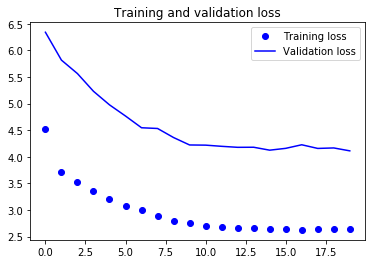

In [33]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()